# Magic Gamma Telescope Practice

In [2]:
# Module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset

**Dataset loading**
* https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [3]:
# google colab 업로드해서 데이터 csv 화일 읽기
from google.colab import files
uploaded=files.upload()

df=pd.read_csv('magic04.data')

Saving magic04.data to magic04.data


In [4]:
# 컬럼명칭 생성
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df.columns=cols
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [5]:
#[class 라벨] 문자 -> 숫자 변경
df['class'].unique()

array(['g', 'h'], dtype=object)

In [6]:
# binary classification: g->1, h->0
df['class']=(df['class']=='g').astype(int)
df['class'].unique()

array([1, 0])

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,1
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,1
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,1
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,1
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,1


**features 간의 관계 보기**

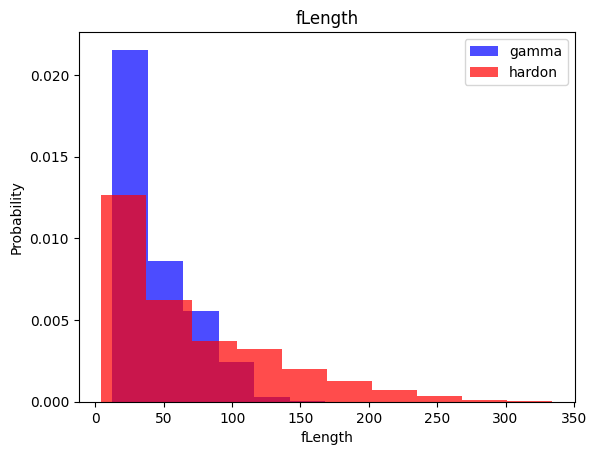

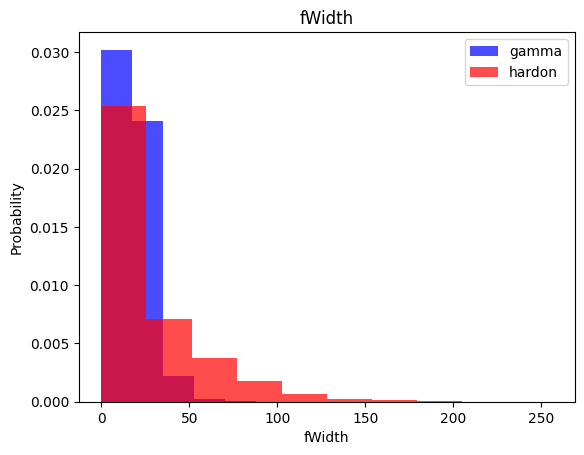

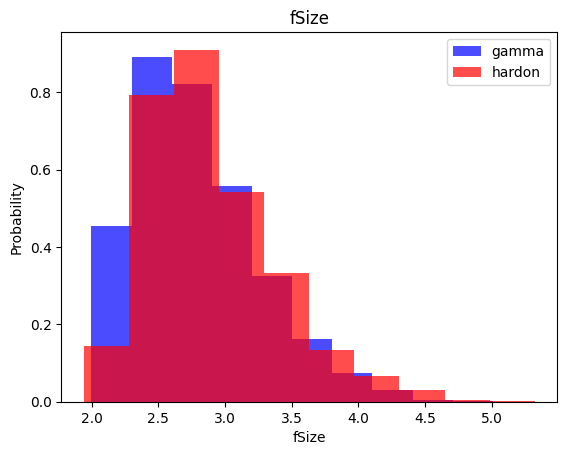

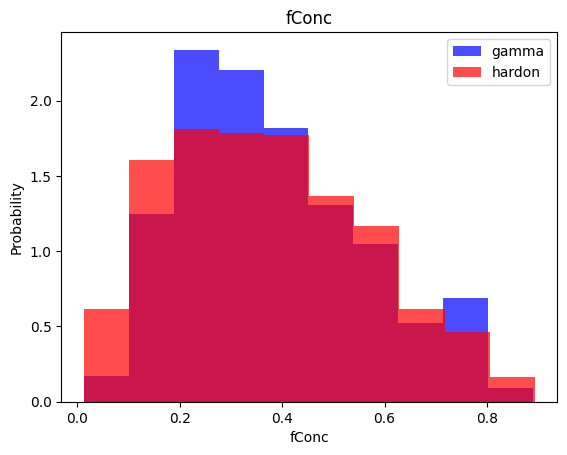

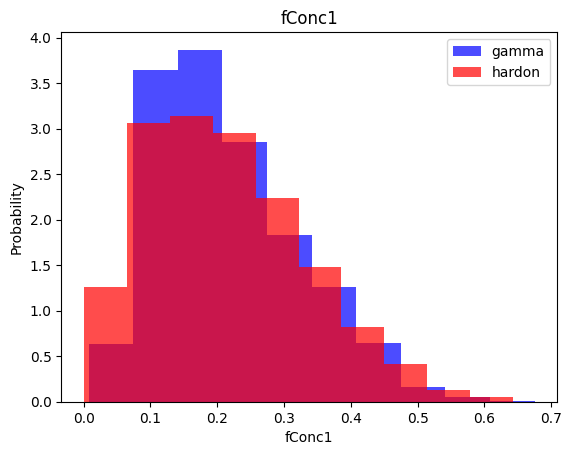

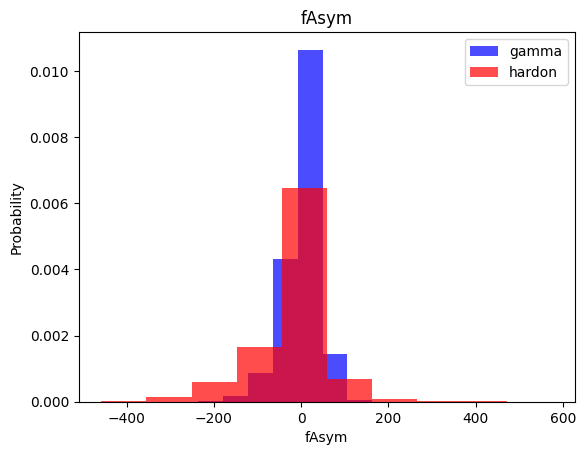

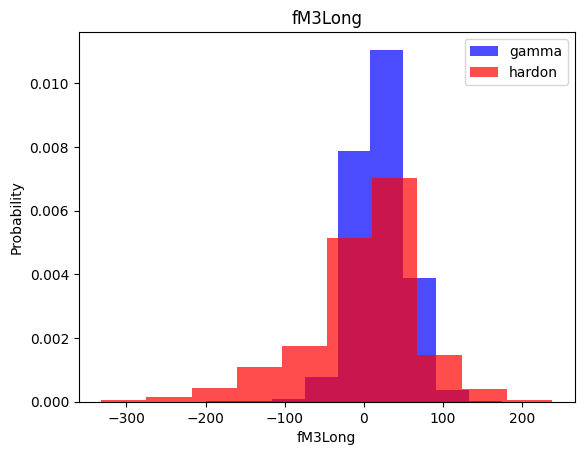

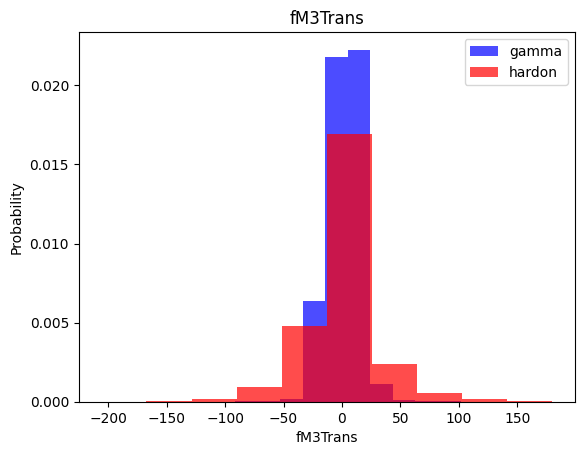

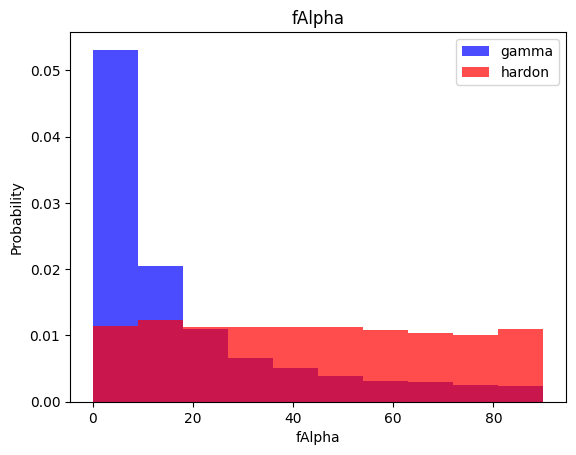

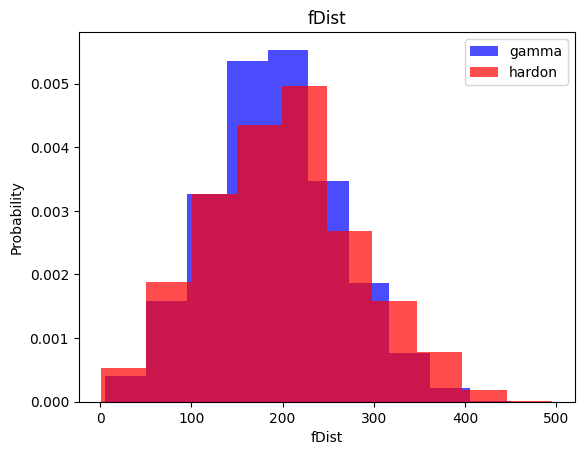

In [8]:
for feature in cols[:-1]: #class 라벨은 제외
  plt.hist(df[df['class']==1][feature], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][feature], color='red', label='hardon', alpha=0.7, density=True)
  plt.title(feature)
  plt.ylabel('Probability')
  plt.xlabel(feature)
  plt.legend()
  plt.show()

**Dataset -> Train/Valdiation/Test**

In [9]:
cutoff=[int(len(df)*0.6), int(len(df)*0.8)]
train, valid, test = np.split(df.sample(frac=1), cutoff)
train.shape, valid.shape, test.shape

((11411, 11), (3804, 11), (3804, 11))

**데이터 정규화 + 오버샘플링**
* 데이터 정규화: 평균 0, 표준편차 1
* 오버샘플링: 라벨 데이터 개수를 균일하게 만들기 위해 오버샘플링

In [10]:
# 라벨에 따른 데이터 개수 확인 -> oversample 필요?
print((train['class']==1).sum()) # class 1라벨 데이터 개수
print((train['class']==0).sum()) # class 0 라벨 데이터 개수

7350
4061


In [11]:
# 모듈 import
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# 정규화 + 오버샘플링 함수 생성
def scale_dataset(dataframe, oversample=False):
  X=dataframe[dataframe.columns[:-1]].to_numpy() #넘파이로 변환
  y=dataframe[dataframe.columns[-1]].to_numpy()

  #객체생성
  scaler=StandardScaler()
  X_scaled=scaler.fit_transform(X)

  #오버샘플링
  if oversample:
    ros=RandomOverSampler()
    X_scaled, y=ros.fit_resample(X_scaled, y)

  #X, y 병합
  data=np.hstack((X_scaled, y.reshape(-1,1))) #hstack은 tuple로 받음 () 주의!

  #data, X_scaled, y 반환
  return data, X_scaled, y

In [12]:
# 정규화+오버샘플링된 train/validation/test
train, X_train, y_train=scale_dataset(train, oversample=True)
valid, X_valid, y_valid=scale_dataset(valid, oversample=False)
test, X_test, y_test=scale_dataset(test, oversample=False)

# Training

**KNN**

In [13]:
# module import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
# 모델생성
knn_model=KNeighborsClassifier(n_neighbors=5) #n_neighbors 인자 지정
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# 예측
y_pred=knn_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [16]:
print(classification_report(y_test, y_pred)) #print 함수를 써야 아래와 같이 출력됨. 왜(?)

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1312
           1       0.86      0.86      0.86      2492

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



**Naive Bayes**

In [17]:
# module import
from sklearn.naive_bayes import GaussianNB

In [18]:
#모듈 생성
nb_model=GaussianNB()
#학습
nb_model.fit(X_train, y_train)

GaussianNB()

In [19]:
#예측
y_pred=nb_model.predict(X_test)

In [20]:
#평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1312
           1       0.74      0.90      0.81      2492

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



** Logistic Regression **

In [21]:
# module import
from sklearn.linear_model import LogisticRegression

In [22]:
# 객체 생성
lr_model=LogisticRegression()
# 학습
lr_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# 예측
y_pred=lr_model.predict(X_test)

In [24]:
# 평가
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1312
           1       0.85      0.81      0.83      2492

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



**SVM**

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model=SVC()
svm_model.fit(X_train, y_train)

SVC()

In [27]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1312
           1       0.89      0.90      0.89      2492

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



**Neural Net**

In [28]:
import tensorflow as tf

In [29]:
# history plot
def plot_history(history):
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()

  plt.show()

In [30]:
# nn_model, history 반환 함수 생성
def train_model(X_train, y_train, num_nodes, dropout_rate, lr, batch_size, epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_rate),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_rate),
      tf.keras.layers.Dense(1, activation='sigmoid')
])
  # compile 필요
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

  # 모델 객체 생성
  history=nn_model.fit(X_train, y_train,
                       epochs=100, batch_size=32,
                       validation_data=(X_valid, y_valid), verbose=0)

  return nn_model, history

In [31]:
epochs=10
num_nodes=16
dropout_rate=0.2
lr=0.01
batch_size=32
nn_model, history=train_model(X_train, y_train,
                                      num_nodes, dropout_rate, lr, batch_size, epochs)

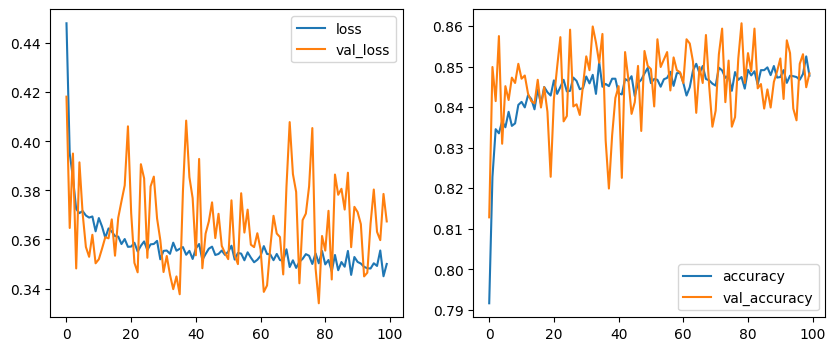

In [32]:
plot_history(history)

In [33]:
#예측
y_pred=nn_model.predict(X_test)
y_pred=(y_pred>0.5).astype(int) # y_pred는 확률값 가지므로 범주형으로 변환
y_pred=y_pred.reshape(-1,) # y_pred는 2차원(n,1) -> 1차원 변환
y_pred

119/119 [==============================] - 0s 2ms/step


array([1, 1, 1, ..., 1, 0, 1])

In [34]:
#평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1312
           1       0.89      0.88      0.89      2492

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.85      0.86      3804



**Neural Net Experiment- Hyperparameter tunning**

16 nodes, dropout 0, lr 0.01, batch_size 32


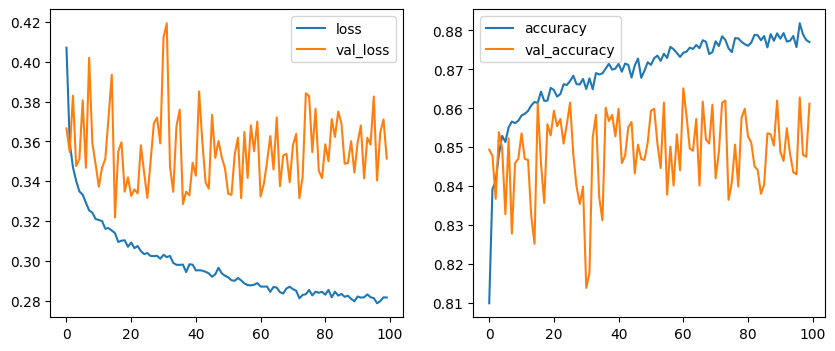

119/119 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8612
16 nodes, dropout 0, lr 0.01, batch_size 64


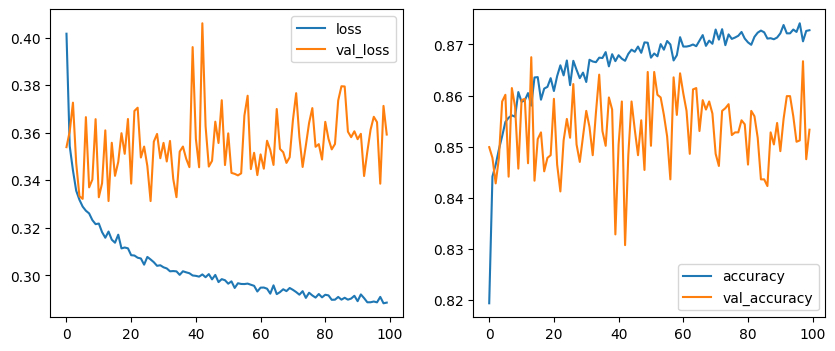

119/119 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8533
16 nodes, dropout 0, lr 0.01, batch_size 128


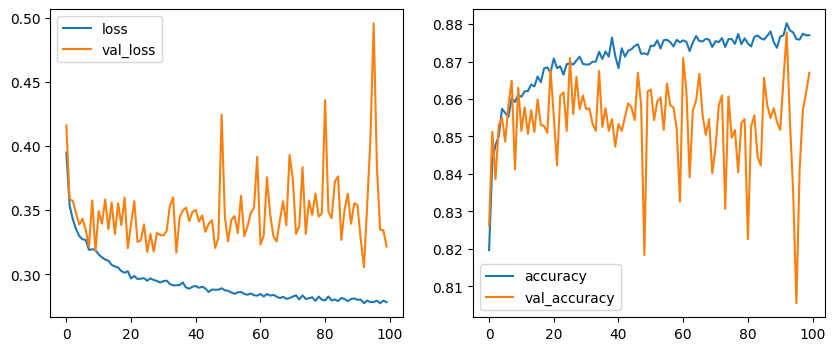

119/119 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.005, batch_size 32


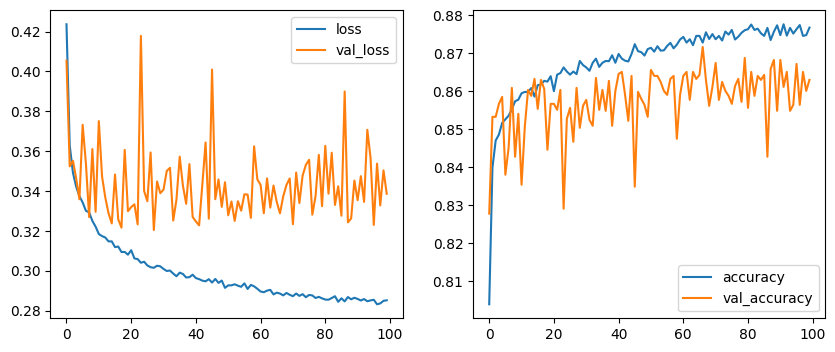

119/119 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8630
16 nodes, dropout 0, lr 0.005, batch_size 64


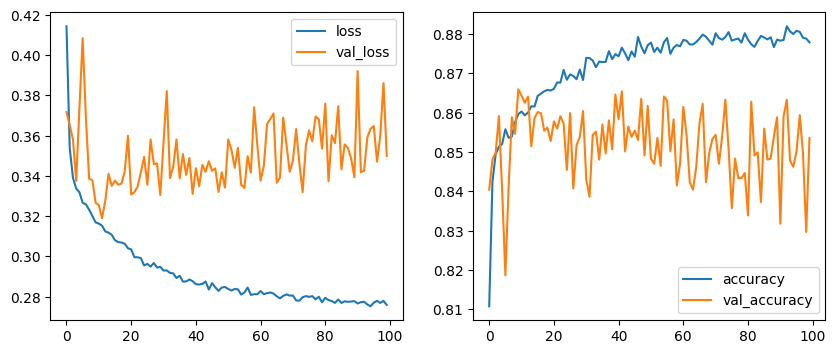

119/119 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8536
16 nodes, dropout 0, lr 0.005, batch_size 128


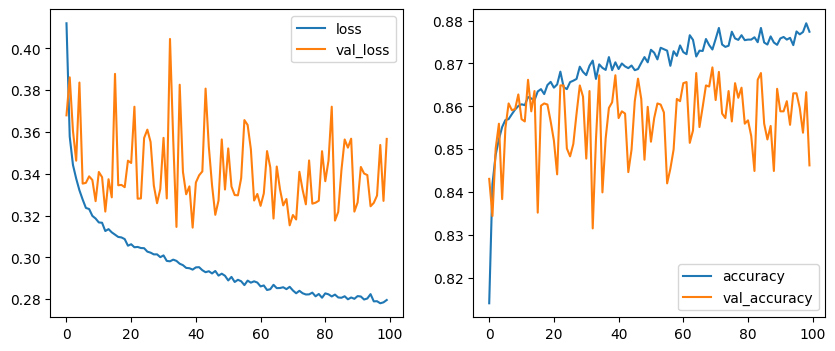

119/119 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8462
16 nodes, dropout 0, lr 0.001, batch_size 32


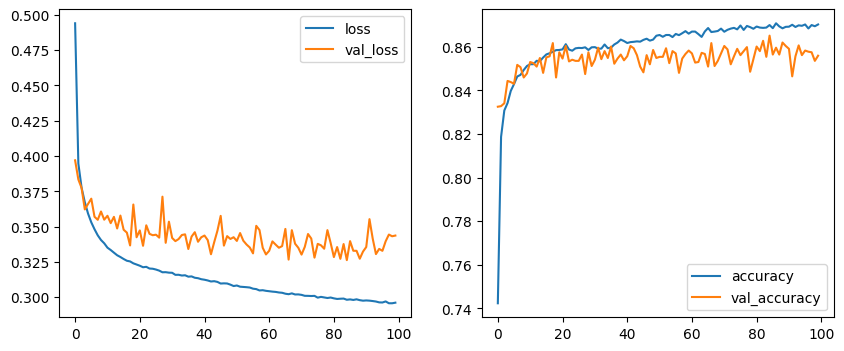

119/119 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8559
16 nodes, dropout 0, lr 0.001, batch_size 64


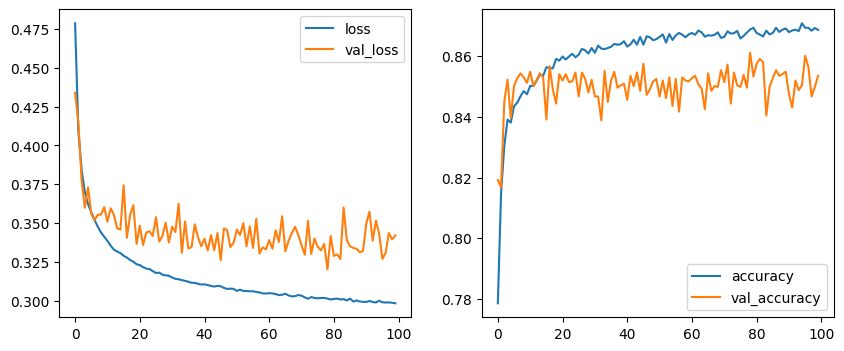

119/119 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.8536
16 nodes, dropout 0, lr 0.001, batch_size 128


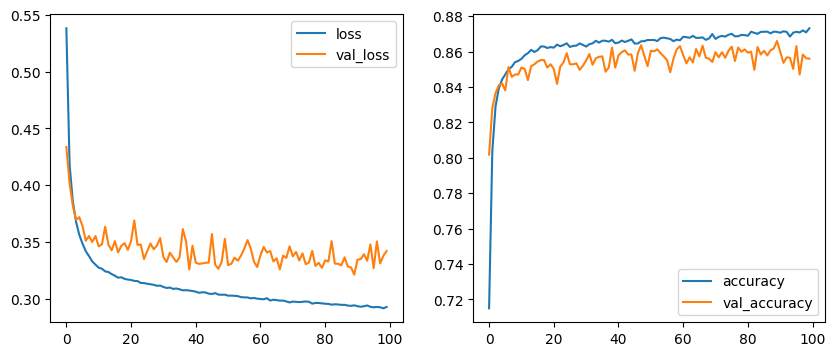

119/119 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8559
16 nodes, dropout 0.2, lr 0.01, batch_size 32


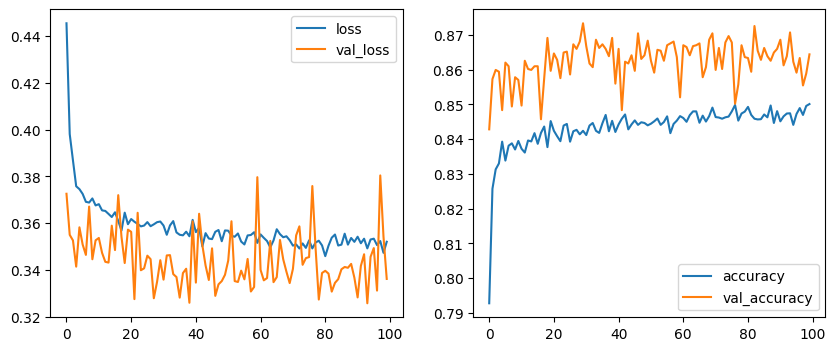

119/119 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.01, batch_size 64


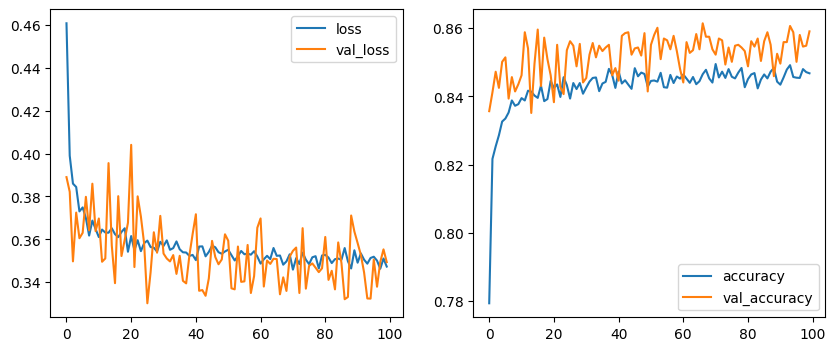

119/119 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8591
16 nodes, dropout 0.2, lr 0.01, batch_size 128


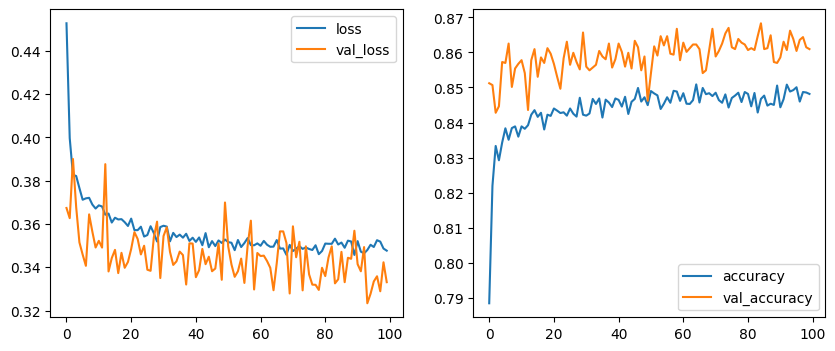

119/119 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8609
16 nodes, dropout 0.2, lr 0.005, batch_size 32


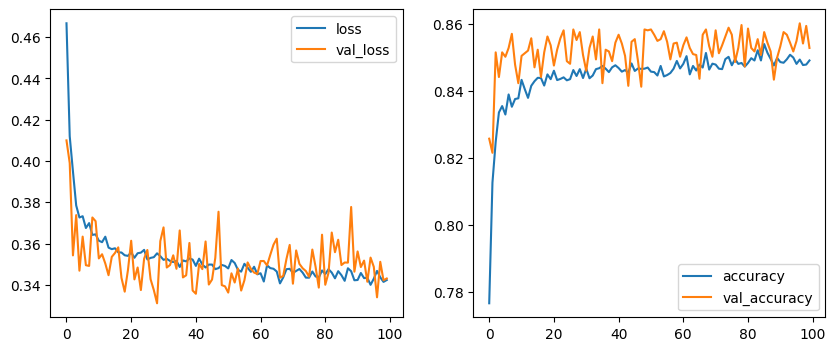

119/119 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8528
16 nodes, dropout 0.2, lr 0.005, batch_size 64


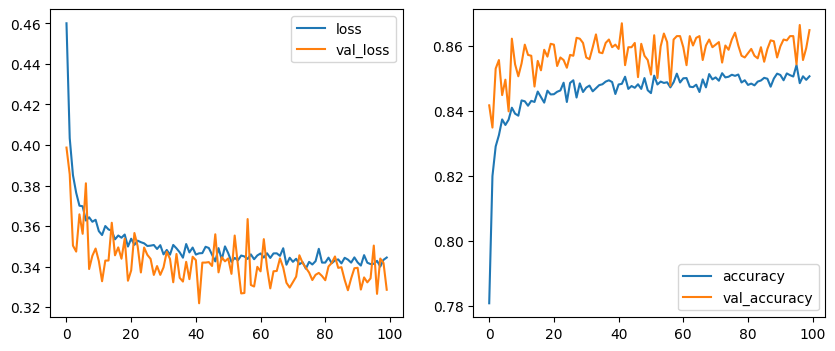

119/119 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.005, batch_size 128


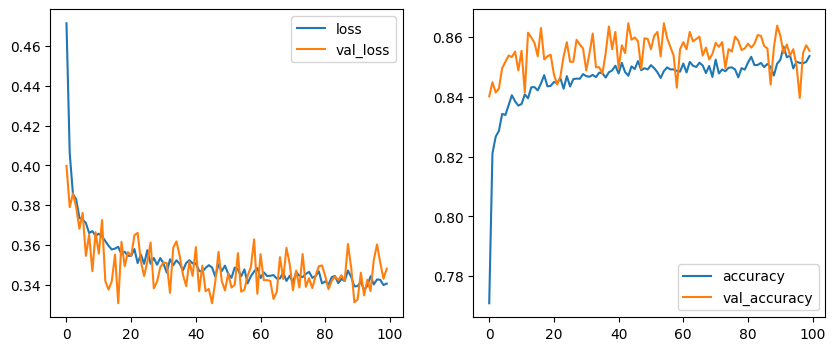

119/119 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8554
16 nodes, dropout 0.2, lr 0.001, batch_size 32


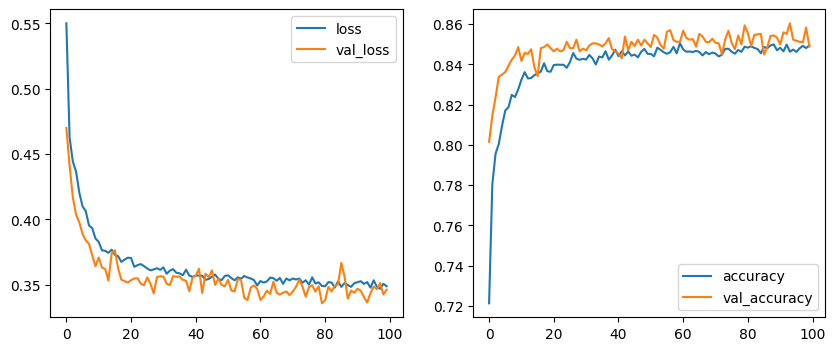

119/119 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8488
16 nodes, dropout 0.2, lr 0.001, batch_size 64


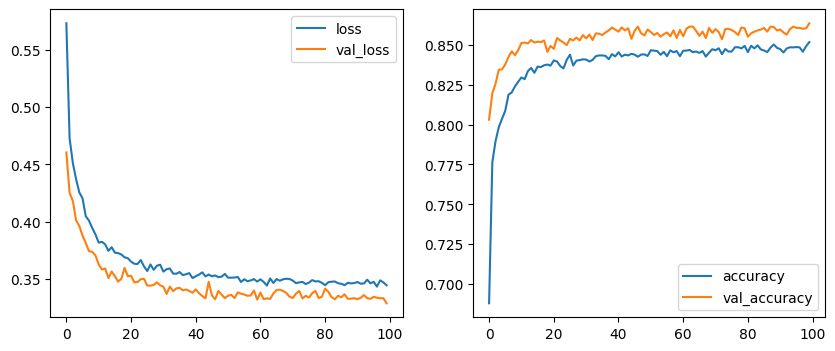

119/119 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8636
16 nodes, dropout 0.2, lr 0.001, batch_size 128


In [ ]:
# Experiments

least_val_loss=float('inf')
least_loss_model=None

epochs=10
for num_nodes in [16,32,64]:
  for dropout_rate in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_rate}, lr {lr}, batch_size {batch_size}")

        model, history=train_model(X_train, y_train,
                                      num_nodes, dropout_rate, lr, batch_size, epochs)
        plot_history(history)
        val_loss=model.evaluate(X_valid, y_valid)[0]
        if val_loss<least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model


In [ ]:
#Best model
y_pred_opt=least_loss_model.predict(X_test)
y_pred_opt=(y_pred_opt>0.5).astype(int) # y_pred는 확률값 가지므로 범주형으로 변환
y_pred_opt=y_pred_opt.reshape(-1,) # y_pred는 2차원(n,1) -> 1차원 변환

In [ ]:
# 최적화 값
print(classification_report(y_test, y_pred_opt))